# Recommendation System & Market Basket Analysis

The aim of this project is to conduct an analysis of the Recommendation System and Market Basket for a database from Amazon.com and Groceries Dataset respectively.

# Content

* [1. Introduction](#1)
* [2. Business Understanding](#2)
* [3. Data Understanding](#3)
    * [3.1 Load Libraries](#3.1)    
    * [3.2. Load Dataset](#3.2)
    * [3.3. Exploratory Data Analysis (EDA)](#3.3)
    * [3.4. Descriptive Statistics](#3.4)
    * [3.5. Data Visualization](#3.5)
* [4. Data Preparation](#4)
* [5. Modeling](#5)
* [7. Bibliography](#7)

<a id='1'></a>
# 1. Introduction

In the digital commerce era, recommendation systems have become an essential tool to enhance the customer experience and maximize the operational efficiency of businesses. This project focuses on implementing a recommendation system and a Market Basket analysis, using a database extracted from https://www.iguazio.com/blog/13-best-free-retail-datasets-for-machine-learning/.

The aim is twofold; on one hand, I seek to understand and predict user preferences and behaviors to offer personalized product suggestions; on the other, I want to uncover hidden patterns in consumer purchasing decisions through Market Basket analysis, which will allow us to identify which products tend to be purchased together.

To carry out this project, I will adopt the CRISP-DM methodology (Cross-Industry Standard Process for Data Mining), a standard six-phase process that guides from business understanding to the deployment of the data mining model. This approach will ensure a systematic and organized development that will cover business understanding, data understanding, data preparation, modeling, evaluation, and finally, the deployment of the recommendation system and Market Basket analysis.

<a id='2'></a>
# 2. Business Understanding

First of all, you have to understand that there are different types of recommendation engines, such as:

* Content-based filtering
    * Plot description-based recommender
    * Metadata-based recommender


* Collaborative-based filtering (two types):
    * User-based Collaborative Filtering
    * Item-based Collaborative Filtering


* Hybrid Systems


* ML Clustering


* Market Basket Analysis (association rule mining)

In this project, I will focus on Content-based filtering, Collaborative-based filtering and Market basket analysis. But before continuing I will make a brief comparison between Collaborative Filtering and Content-Based Filtering System and what is the purpose and benefits that both clients and companies have when creating a recommendation system.

Reference: Hands-On Recommendation Systems with Python, Rounak Banik, Copyright © 2018 Packt Publishing - ISBN 978-1-78899-375-3

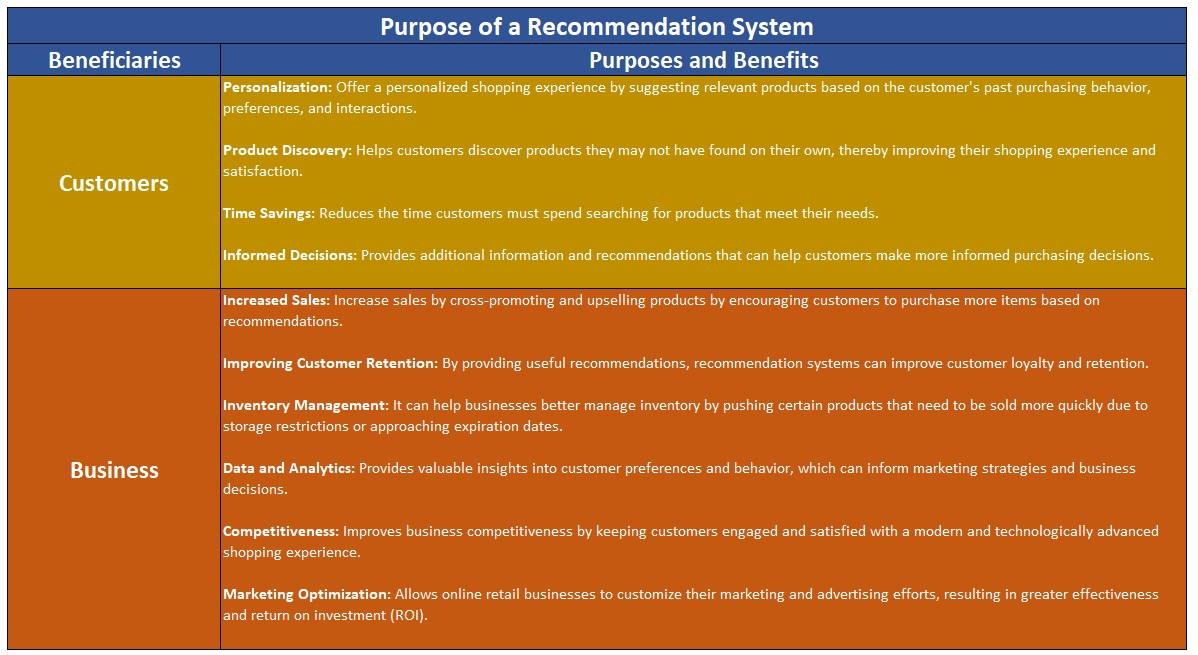

In [1]:
from IPython.display import Image
Image(filename =r'Purpose.jpg')

<a id='3'></a>
# 3. Data Understanding

<a id='3.1'></a>
## 3.1 Load Libraries

In [2]:
import pandas as pd
import math
import numpy as np
import scipy.stats as stats
from scipy.stats import binom
import seaborn as sns
import matplotlib.pyplot as plt
import re
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors


import warnings
warnings.filterwarnings('ignore')

<a id='3.2'></a>
## 3.2. Load Dataset

In [3]:
df_amazon = pd.read_csv("amazon_co-ecommerce_sample.csv")

<a id='3.3'></a>
## 3.3. Exploratory Data Analysis (EDA)

In [4]:
df_amazon.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN


In [5]:
df_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   uniq_id                                      10000 non-null  object 
 1   product_name                                 10000 non-null  object 
 2   manufacturer                                 9993 non-null   object 
 3   price                                        8565 non-null   object 
 4   number_available_in_stock                    7500 non-null   object 
 5   number_of_reviews                            9982 non-null   object 
 6   number_of_answered_questions                 9235 non-null   float64
 7   average_review_rating                        9982 non-null   object 
 8   amazon_category_and_sub_category             9310 non-null   object 
 9   customers_who_bought_this_item_also_bought   8938 non-null   object 
 10 

In [6]:
df_amazon.shape

(10000, 17)

<a id='3.4'></a>
## 3.4. Descriptive Statistics

In [7]:
df_amazon.describe(include='all')

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
count,10000,10000,9993,8565,7500,9982,9235.000000,9982,9310,8938,9349,9942,9349,6935,914,9979,6918
unique,10000,9964,2651,2625,89,194,NaN,19,255,8755,8514,9939,8514,6749,910,9901,6581
top,eac7efa5dbd3d667f26eb3d3ab504464,Polyhedral Dice,LEGO,£9.99,2 new,1,NaN,5.0 out of 5 stars,Die-Cast & Toy Vehicles > Toy Vehicles & Acces...,http://www.amazon.co.uk/Scalextric | http://ww...,"Welcome to k2, we offer combined items postage...",Technical Details Manufacturer recommended age...,"Welcome to k2, we offer combined items postage...",http://www.amazon.co.uk/Scalextric | http://ww...,Is it 12 days or 24? // 24,Five Stars // 5.0 // 1 Feb. 2015 // By\n \n...,"{""seller""=>{""Seller_name_1""=>""k2-accessories"",..."
freq,1,3,171,189,1337,4315,NaN,5140,880,60,113,2,113,38,2,5,27
mean,NaN,NaN,NaN,NaN,NaN,NaN,1.834976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,2.517268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_amazon.isnull().sum()

uniq_id                                           0
product_name                                      0
manufacturer                                      7
price                                          1435
number_available_in_stock                      2500
number_of_reviews                                18
number_of_answered_questions                    765
average_review_rating                            18
amazon_category_and_sub_category                690
customers_who_bought_this_item_also_bought     1062
description                                     651
product_information                              58
product_description                             651
items_customers_buy_after_viewing_this_item    3065
customer_questions_and_answers                 9086
customer_reviews                                 21
sellers                                        3082
dtype: int64

In [9]:
df_amazon.columns

Index(['uniq_id', 'product_name', 'manufacturer', 'price',
       'number_available_in_stock', 'number_of_reviews',
       'number_of_answered_questions', 'average_review_rating',
       'amazon_category_and_sub_category',
       'customers_who_bought_this_item_also_bought', 'description',
       'product_information', 'product_description',
       'items_customers_buy_after_viewing_this_item',
       'customer_questions_and_answers', 'customer_reviews', 'sellers'],
      dtype='object')

<a id='3.5'></a>
## 3.5. Data Visualization

# Data Preparation

First I will remove all line breaks, '_' or '__' symbols, and double spaces or more.

In [10]:
import re

def clean_text(text):
    if not isinstance(text, str):
        return text
    # Eliminar saltos de línea
    text = text.replace('\n', ' ')
    # Reemplazar '_' y '__' con espacios
    text = text.replace('_', ' ')
    # Convertir dos o más espacios en uno
    text = re.sub(r'\s{2,}', ' ', text)
    return text

# Aplicando la función a todas las columnas de texto del DataFrame
df_amazon = df_amazon.applymap(clean_text)

df_amazon.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller name 1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By kennet...,"{""seller""=>{""Seller name 1""=>""UHD WHOLESALE"", ..."
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller name 1""=>""DEAL-BOX"", ""Sel..."
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN,I love it // 5.0 // 22 July 2013 // By Lilla L...,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN


The next step will be to review the 'customer_reviews' column since within this column there are reviews from different users who bought the product from the 'product_name' column and there is also the rating that each user gave to the purchased product and the date on which The review was carried out, we will assume that it is the date on which the user purchased the product. This data will later help us to carry out a sentiment analysis that will help us make better product recommendations and we will also be able to create a database with different transactions, which will be useful to us to make a Market Basket. Analysis.

The reviews in the 'customer_reviews' column follow a pattern that includes the review title, the rating (in numeric format followed by '.0'), the date, the word 'By', and then the user's name. (// 4.0 // 6 April 2014 // By Copnovelist on 6 April 2014 //)

In [13]:
import pandas as pd
import re

# Paso 2: Definir el Patrón de Expresión Regular
# El patrón ajustado para capturar todas las variaciones de fechas y nombres en las reseñas
pattern = r"// (\d+\.\d+) // (\d{1,2} [A-Za-z]+\.? \d{4}) // By (.*?) on \2 //"

# Paso 3: Extraer Reseñas Usando el Patrón
def extract_reviews(row):
    if pd.isna(row['customer_reviews']):
        return []
    return re.findall(pattern, row['customer_reviews'])

df_amazon['extracted_reviews'] = df_amazon.apply(extract_reviews, axis=1)

# Paso 4: Expandir el DataFrame
# Creando un nuevo DataFrame a partir de las reseñas extraídas
reviews_df = df_amazon['extracted_reviews'].apply(pd.Series).stack().reset_index(level=1, drop=True)
reviews_df = reviews_df.apply(pd.Series)
reviews_df.columns = ['review_rating', 'review_date', 'review_author']

# Uniendo el nuevo DataFrame de reseñas con el DataFrame original
# Manteniendo la columna 'customer_reviews'
df_amazon_expanded = df_amazon.drop(columns=['extracted_reviews']).join(reviews_df)

# Mostrando las primeras filas del DataFrame expandido
df_amazon_expanded.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers,review_rating,review_date,review_author
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller name 1""=>""Amazon.co.uk"", ...",4.0,6 April 2014,Copnovelist
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller name 1""=>""Amazon.co.uk"", ...",5.0,11 April 2015,richard
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller name 1""=>""Amazon.co.uk"", ...",5.0,23 April 2014,Pinkhandbag
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller name 1""=>""Amazon.co.uk"", ...",5.0,11 Jun. 2014,Gary John Mapson
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller name 1""=>""Amazon.co.uk"", ...",5.0,7 Dec. 2014,David Baker


In [12]:
dfsdfsd

NameError: name 'dfsdfsd' is not defined

In [ ]:
# Función ajustada para extraer el nombre del usuario considerando el nuevo patrón encontrado
def extract_usernames_adjusted(review):
    # Buscar todos los patrones que coincidan con 'By\n____\n____' seguido del nombre del usuario
    matches = re.findall(r'By\n____\n____([^\n]+)', review)
    return matches

# Aplicar la función ajustada a la columna 'customer_reviews_modified'
df_amazon['usernames'] = df_amazon['customer_reviews'].apply(lambda x: extract_usernames_adjusted(str(x)))

# Mostrar los primeros resultados para verificar
df_amazon[['customer_reviews', 'usernames']].head()

Ahora que extrajimos el nombre de cada usuario dentro de la columna 'customer_reviews' vamos a extraer todos los nombres de usuario unicos para poder crear una ID unica para cada usuario.

Aqui podemos observar que hay un total de 21976 usuarios unicos y a cada usuario lo reemplazamos por una ID unica.

In [ ]:
import ast

# Extraer todos los nombres de usuario únicos
unique_usernames = set()
for usernames in df_amazon['usernames']:
    unique_usernames.update(usernames)

# Convertir el conjunto en una lista para una mejor manipulación
unique_usernames_list = list(unique_usernames)

# Mostrar el número de nombres de usuario únicos
len(unique_usernames_list)

In [ ]:
# Crear un diccionario para mapear cada nombre de usuario a una ID única
user_id_map = {username: f"user_{i}" for i, username in enumerate(unique_usernames_list)}

# Función para reemplazar los nombres de usuario en la columna 'usernames' por sus respectivas IDs únicas
def replace_usernames_with_ids(usernames):
    return [user_id_map[username] for username in usernames]

# Aplicar la función al DataFrame
df_amazon['usernames'] = df_amazon['usernames'].apply(replace_usernames_with_ids)

# Mostrar las primeras filas para verificar los cambios
df_amazon.head()

Lo que vamos a hacer a continuacion es expandir el DataFrame ('df_amazon') original de modo que cada nombre de usuario en la columna 'usernames' tenga su propia fila, manteniendo los demás datos de cada fila intactos. y crearemos un nuevo DataFrame llamado df_amazon2.

In [ ]:
# Expandir el DataFrame original replicando todas las columnas
expanded_rows = []
for _, row in df_amazon.iterrows():
    for username in row['usernames']:
        new_row = row.to_dict()
        new_row['username'] = username  # Añadir el nombre de usuario a la nueva fila
        expanded_rows.append(new_row)

# Crear el DataFrame expandido
df_amazon2 = pd.DataFrame(expanded_rows)

# Eliminar la columna 'usernames' original, ya que ahora tenemos 'username'
df_amazon2 = df_amazon2.drop('usernames', axis=1)

df_amazon2.head()

In [ ]:
df_amazon2.info()

In [ ]:
# Reemplazar todos los guiones bajos y dobles guiones bajos o mayores por espacios en blanco
df_amazon2 = df_amazon2.replace(to_replace=r'_+', value=' ', regex=True)

# Mostrar las primeras filas del DataFrame modificado para verificar los cambios
df_amazon2.head()

In [ ]:
# df_amazon2.to_csv('df_amazon2.csv', index=False)

In [ ]:
import re

# Función para limpiar el texto: eliminar saltos de línea y reemplazar múltiples espacios por uno solo
def clean_text(text):
    if isinstance(text, str):
        # Eliminar saltos de línea y reemplazar múltiples espacios con uno solo
        text = re.sub(r'\s+', ' ', text)
    return text

# Aplicando la función a todas las columnas de tipo objeto (texto)
for col in df_amazon2.select_dtypes(include=['object']).columns:
    df_amazon2[col] = df_amazon2[col].apply(clean_text)

# Mostrando las primeras filas después de la limpieza
df_amazon2.head()

In [ ]:
import re

# Expresión regular para extraer la fecha con el formato específico
# El patrón asume que el formato es "// By [Nombre] on [fecha] //"
date_pattern = r"// By [A-Za-z ]+ on (\d{1,2} [A-Za-z]+\.? \d{4}) //"

# Aplicar la expresión regular a la columna 'customer_reviews'
df_amazon2['extracted_dates'] = df_amazon2['customer_reviews'].apply(lambda x: re.findall(date_pattern, x))

# Mostrar los resultados
df_amazon2[['customer_reviews', 'extracted_dates']].head()

In [ ]:
gfdgdfgdfgdfg

<a id='4'></a>
# 4. Data Preparation to Content-based filtering - Metadata-based recommender

According to our data, a metadata-based recommender system would be the most suitable option for recommendation, as our DataFrame includes a variety of features such as product name, Amazon category and subcategory, product description, and customer reviews. These data provide a wealth of information that can be used to create a metadata-based recommendation model.

Furthermore, unlike models that focus on plot descriptions or stories, our data does not center around this type of characteristic, making the approach based on plot descriptions less relevant.

On the other hand, the complexity of the Product Data we are analyzing (such as model train sets) may have unique characteristics that are better captured through a more detailed analysis of the metadata, rather than just focusing on general descriptions.

Since users may have specific preferences in terms of product features, a metadata-based approach can provide more personalized and relevant recommendations.

In summary, a metadata-based recommendation approach will more effectively leverage the variety and richness of the available data, providing more accurate and customized recommendations to users.

Reference: Chapter 4.Building Content-Based Recommenders - Hands-On Recommendation Systems with Python, Rounak Banik, Copyright © 2018 Packt Publishing - ISBN 978-1-78899-375-3

In [ ]:
 df_selected = df_amazon[
        ['uniq_id', 'product_name', 'price', 'number_available_in_stock', 
         'number_of_reviews', 'average_review_rating', 'amazon_category_and_sub_category', 
         'customers_who_bought_this_item_also_bought', 'product_description', 
         'items_customers_buy_after_viewing_this_item', 'customer_reviews','sellers']]

In [ ]:
df_selected.head()

In this step I will transform all the data in the following columns to lowercase, I do this in order to later be able to associate these columns with each other, therefore they must be in the same format and type.

In [ ]:
# Columns to lowercase
columns_to_lowercase = ['product_name','amazon_category_and_sub_category','customers_who_bought_this_item_also_bought',
                        'product_description','items_customers_buy_after_viewing_this_item', 'customer_reviews',
                        'sellers']

for column in columns_to_lowercase:
    df_selected[column] = df_selected[column].str.lower()

print(df_selected[columns_to_lowercase].head())

In [ ]:
# Extract Price
df_selected['price'] = df_selected['price'].str.extract(r'(\d+\.?\d*)').astype(float)

print(df_selected['price'])

In [ ]:
# Extract rating
df_selected['average_review_rating'] = df_selected['average_review_rating'].str.extract(r'(\d+\.\d+)').astype(float)

print(df_selected['average_review_rating'].head())

In [ ]:
# Fill all cells with NaN values or empty cells with 'Unknown'
df_selected.fillna('Unknown', inplace=True)

df_selected.head()

In [ ]:
# Replace '-' with a space
columns_to_replace = [ 'product_name', 'customers_who_bought_this_item_also_bought','product_description',
                      'items_customers_buy_after_viewing_this_item']

for column in columns_to_replace:
    df_selected[column] = df_selected[column].str.replace('-', ' ')

print(df_selected[columns_to_replace].head())

In [ ]:
# Extract subcategories
num_sub_categories = 5

# Split categories to new columns
split_categories = df_selected['amazon_category_and_sub_category'].str.split('>', expand=True).iloc[:, :num_sub_categories]
for i in range(num_sub_categories):
    df_selected[f'sub_category{i}'] = split_categories[i]

# Drop 'amazon_category_and_sub_category'
df_selected.drop('amazon_category_and_sub_category', axis=1, inplace=True)

df_selected.head()

In [ ]:
# Extract product names
def extract_product_names(url_list):
    if not isinstance(url_list, str):
        return []

    # Dividir la cadena en URLs individuales
    urls = url_list.split('|')

    product_names = []
    for url in urls:
        match = re.search(r'www\.amazon\.co\.uk/([^/]+)', url)
        if match:
            product_names.append(match.group(1).replace('-', ' '))

    return product_names

# Apply 'customers_who_bought_this_item_also_bought'
df_selected['extracted_product_names1'] = df_selected['customers_who_bought_this_item_also_bought'].apply(extract_product_names)

# Apply 'items_customers_buy_after_viewing_this_item'
df_selected['extracted_product_names2'] = df_selected['items_customers_buy_after_viewing_this_item'].apply(extract_product_names)

print(df_selected[['customers_who_bought_this_item_also_bought', 'extracted_product_names1',
                  'items_customers_buy_after_viewing_this_item', 'extracted_product_names2' ]].head())

In [ ]:
# Drop 'customers_who_bought_this_item_also_bought'
df_selected.drop('customers_who_bought_this_item_also_bought', axis=1, inplace=True)

# Drop 'items_customers_buy_after_viewing_this_item'
df_selected.drop('items_customers_buy_after_viewing_this_item', axis=1, inplace=True)

In [ ]:
# Change name 'extracted_product_names1' to 'customers_who_bought_this_item_also_bought'
df_selected.rename(columns={'extracted_product_names1': 'customers_who_bought_this_item_also_bought'}, inplace=True)

# Change name 'extracted_product_names2' to 'items_customers_buy_after_viewing_this_item'
df_selected.rename(columns={'extracted_product_names2': 'items_customers_buy_after_viewing_this_item'}, inplace=True)

In [ ]:
df_selected.head()

In [ ]:
# Sentiment Analysis 'customer_reviews'
def calculate_sentiment(text):
    try:
        analysis = TextBlob(text)
        return analysis.sentiment.polarity
    except:
        return None

df_selected['review_sentiment'] = df_selected['customer_reviews'].apply(calculate_sentiment)

# Classification
df_selected['sentiment_category'] = pd.cut(df_selected['review_sentiment'], 
                                           bins=[-1, -0.01, 0.01, 1], 
                                           labels=["Negative", "Neutral", "Positive"])

# Sentiment counts
sentiment_counts = df_selected['sentiment_category'].value_counts()

print(sentiment_counts)

In [ ]:
df_selected.head()

In [ ]:
columns_to_concatenate = ['product_description','sub_category0', 'sub_category1', 'sub_category2', 'sub_category3', 
                          'sub_category4', 'customers_who_bought_this_item_also_bought', 
                          'items_customers_buy_after_viewing_this_item','sentiment_category']

df_selected['concatenated_metadata'] = df_selected[columns_to_concatenate].apply(
    lambda x: ' '.join(x.dropna().astype(str)), axis=1
)

In [ ]:
df_selected[['concatenated_metadata']].head(5)

In [ ]:
tfidf = TfidfVectorizer(stop_words='english')
df_selected['concatenated_metadata'] = df_selected['concatenated_metadata'].fillna('').astype(str)

tfidf_matrix = tfidf.fit_transform(df_selected['concatenated_metadata'])

In [ ]:
tfidf_matrix.shape

<a id='5'></a>
# 5. Modeling

## Content-based filtering - Metadata-based recommender

In [ ]:
cosine_sim = cosine_similarity(tfidf_matrix[:10000], tfidf_matrix[:10000])

In [ ]:
# Function to get recommendations based on cosine similarity
def get_recommendations(title, cosine_sim, df_selected, indices):
    # Get the index of the product that matches the title
    idx = indices[title]

    # Get the similarity scores of all products with that product
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the products based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar products
    sim_scores = sim_scores[1:11]

    # Get the indices of the products
    product_indices = [i[0] for i in sim_scores]

    # Return the 10 most similar products
    return df_selected['product_name'].iloc[product_indices]

In [ ]:
# Reset index of your main DataFrame and construct reverse mapping as before
df_selected = df_selected.reset_index()
indices = pd.Series(df_selected.index, index=df_selected['product_name'])

In [ ]:
# Get recommendations for a specific product
recommendations = get_recommendations('justice league of america series 3 green lantern action figure', cosine_sim, df_selected, indices)

recommendations

# Data Preparation to Item-Item Collaborative Filtering

In [ ]:
df_selected2 = df_selected[
        ['uniq_id','product_name','price','average_review_rating','sub_category0','sub_category1','sub_category2',
         'sub_category3','sub_category4','customers_who_bought_this_item_also_bought',
         'items_customers_buy_after_viewing_this_item', 'sentiment_category']]

In [ ]:
df_selected2 = df_selected2.merge(df_amazon[['uniq_id', 'manufacturer']], on='uniq_id', how='left')

In [ ]:
# Columns 'manufacturer' to lowercase
columns_to_lowercase = ['manufacturer']

for column in columns_to_lowercase:
    df_selected2[column] = df_selected2[column].str.lower()

print(df_selected2[columns_to_lowercase].head())

I am going to replace NaN or empty values in my dataframe with 'Unknown'. However, before applying the function df_selected2.fillna('Unknown', inplace=True), I need to add 'Unknown' to the categories of my 'sentiment_category' column. This step is crucial because, in Pandas, a Categorical column only accepts values that belong to its predefined categories. Attempting to fill missing values with an undefined category in 'sentiment_category' will result in an error. Therefore, I must first ensure that 'Unknown' is included in the set of allowed categories.

In [ ]:
# Add 'Unknown' to the categories in the 'sentiment_category' column
if 'sentiment_category' in df_selected2.columns:
    df_selected2['sentiment_category'] = df_selected2['sentiment_category'].cat.add_categories('Unknown')

# Fill all cells with NaN values or empty cells with 'Unknown'
df_selected2.fillna('Unknown', inplace=True)

In [ ]:
df_selected2.isnull().sum()

In [ ]:
df_selected2.head()

In [ ]:
df_selected2.info()

In [ ]:
columns_to_concatenate2 = ['product_name','manufacturer','sub_category0',
                           'sub_category1','sub_category2','sub_category3','sub_category4',
                           'customers_who_bought_this_item_also_bought','items_customers_buy_after_viewing_this_item',
                          'sentiment_category']

df_selected2['concatenated_metadata2'] = df_selected2[columns_to_concatenate2].apply(
    lambda x: ' '.join(x.dropna().astype(str)), axis=1
)

In [ ]:
df_selected2[['concatenated_metadata2']].head(5)

In [ ]:
tfidf = TfidfVectorizer(stop_words='english')
df_selected2['concatenated_metadata2'] = df_selected2['concatenated_metadata2'].fillna('').astype(str)

tfidf_matrix = tfidf.fit_transform(df_selected2['concatenated_metadata2'])

# 5. Modeling

## Item-Item Collaborative Filtering

In [ ]:
# N-Neigbors
n_neighbors = 5

# Train NearestNeighbors model
model_nn = NearestNeighbors(n_neighbors=n_neighbors, algorithm='auto', metric='cosine', n_jobs=-1)
model_nn.fit(tfidf_matrix)

# N-Nearest Neighbors for each product
distances, indices = model_nn.kneighbors(tfidf_matrix)

# Print only the first 4 examples
for i in range(4):
    product = df_selected2.iloc[i]['product_name']
    neighbors = df_selected2.iloc[indices[i]]['product_name']
    
    print(f"Products closest to '{product}':")
    for neighbor in neighbors:
        print(f" - {neighbor}")
    print("\n")

In [ ]:
cosine_sim = cosine_similarity(tfidf_matrix[:10000], tfidf_matrix[:10000])

In [ ]:
# Similarity matrix to a DataFrame
cosine_sim_df = pd.DataFrame(cosine_sim, index=df_selected2['product_name'], columns=df_selected2['product_name'])
cosine_sim_df.head(2)

## Recommendation

In [ ]:
# Function to get recommendations based on cosine similarity
def get_recommendations(title, cosine_sim, df_selected2, indices):
    # Get the index of the product that matches the title
    idx = indices[title]

    # Get the similarity scores of all products with that product
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the products based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar products
    sim_scores = sim_scores[1:11]

    # Get the indices of the products
    product_indices = [i[0] for i in sim_scores]

    # Return the 10 most similar products
    return df_selected2['product_name'].iloc[product_indices]

In [ ]:
# Reset index of your main DataFrame and construct reverse mapping as before
df_selected2 = df_selected2.reset_index()
indices = pd.Series(df_selected2.index, index=df_selected2['product_name'])

In [ ]:
# Get recommendations for a specific product
recommendations2 = get_recommendations('justice league of america series 3 green lantern action figure', cosine_sim, df_selected2, indices)

recommendations2

# Evaluation

Evaluating a recommendation model, especially a system based on collaborative filtering, can be challenging as there aren't always 'correct' labels or results to compare against.

In this case, my recommendation system isn't designed to predict numerical ratings, so MSE (Mean Squared Error) or RMSE (Root Mean Squared Error) wouldn't be appropriate metrics for evaluation. These metrics are more suitable for models that make quantitative predictions, like predicting ratings in a collaborative filtering system.

On the other hand, given the structure of our data, a qualitative evaluation is more useful since I don't have test data. Therefore, I can manually examine a set of recommendations to assess their relevance.

In this scenario, we will use 3 different products to evaluate the model's recommendations

# Comparison

In [ ]:
Image(filename =r'Comparison.jpg')

# Market Basket Analysis (MBA)

In [ ]:
df_groceries = pd.read_csv("Groceries_dataset.csv")

In [ ]:
df_groceries.head()

In [ ]:
df_groceries.info()

In [ ]:
df_groceries.isnull().sum()

## Apriori Algorithm

In [ ]:
# Basket
basket = (df_groceries.groupby(['Member_number', 'Date'])['itemDescription']
          .apply(lambda x: ','.join(x))
          .reset_index())

# Dataframe
basket_set = basket['itemDescription'].str.get_dummies(',')

basket_set.head()

In [ ]:
# Convertir los valores a booleanos
basket_set_bool = basket_set.applymap(lambda x: True if x > 0 else False)

In [ ]:
from mlxtend.frequent_patterns import apriori

# Apriori
frequent_itemsets = apriori(basket_set_bool, min_support=0.01, use_colnames=True)

frequent_itemsets.head(10)

In [ ]:
from mlxtend.frequent_patterns import association_rules

# Association Rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.01)

rules.head()

## FP Growth Algorithm

In [ ]:
# Basket
basket2 = (df_groceries.groupby(['Member_number', 'Date'])['itemDescription']
          .apply(lambda x: ','.join(x))
          .reset_index())

# Dataframe
basket_set2 = basket2['itemDescription'].str.get_dummies(',')

basket_set2.head()

In [ ]:
# Convertir los valores a booleanos
basket_set_bool2 = basket_set2.applymap(lambda x: True if x > 0 else False)

In [ ]:
from mlxtend.frequent_patterns import fpgrowth

# FP Growth
frequent_itemsets = fpgrowth(basket_set_bool2, min_support=0.01, use_colnames=True)

frequent_itemsets.head(10)

In [ ]:
from mlxtend.frequent_patterns import association_rules

# Association Rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.01)

rules.head()

<a id='7'></a>
# 7. Bibliography